In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy import stats

control_data = pd.read_csv('C:/Users/berie/Downloads/Compressed/archive_6/control_group.csv', sep = ";")
test_data = pd.read_csv('C:/Users/berie/Downloads/Compressed/archive_6/test_group.csv', sep = ";")

In [2]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [3]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

In [4]:
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)

C:\Users\berie\AppData\Local\Temp\ipykernel_22140\911907717.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data,


In [5]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


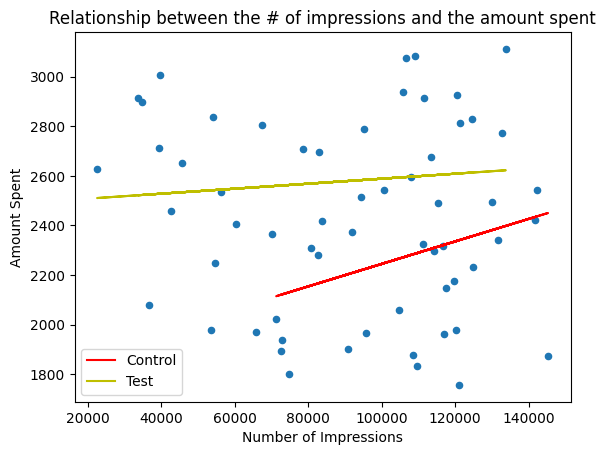

In [6]:
ab_data.plot(kind='scatter',x='Number of Impressions',y='Amount Spent')
slope,intercept,rvalue,pvalue,stderr=stats.linregress(control_data['Number of Impressions'],control_data['Amount Spent'])
plt.plot(control_data['Number of Impressions'],slope*control_data['Number of Impressions']+intercept,color='r',label='Control')

slope,intercept,rvalue,pvalue,stderr=stats.linregress(test_data['Number of Impressions'],test_data['Amount Spent'])
plt.plot(test_data['Number of Impressions'],slope*test_data['Number of Impressions']+intercept,color='y',label='Test')
plt.legend()
plt.title("Relationship between the # of impressions and the amount spent")
plt.show()

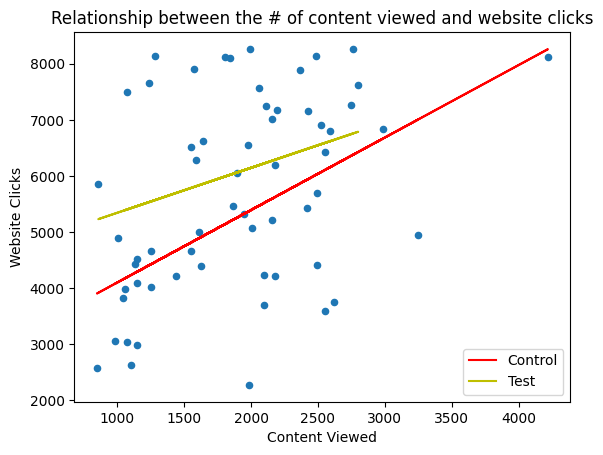

In [7]:
ab_data.plot(kind='scatter',x='Content Viewed',y='Website Clicks')
slope,intercept,rvalue,pvalue,stderr=stats.linregress(control_data['Content Viewed'],control_data['Website Clicks'])
plt.plot(control_data['Content Viewed'],slope*control_data['Content Viewed']+intercept,color='r',label='Control')

slope,intercept,rvalue,pvalue,stderr=stats.linregress(test_data['Content Viewed'],test_data['Website Clicks'])
plt.plot(test_data['Content Viewed'],slope*test_data['Content Viewed']+intercept,color='y',label='Test')
plt.legend()
plt.title("Relationship between the # of content viewed and website clicks")
plt.show()

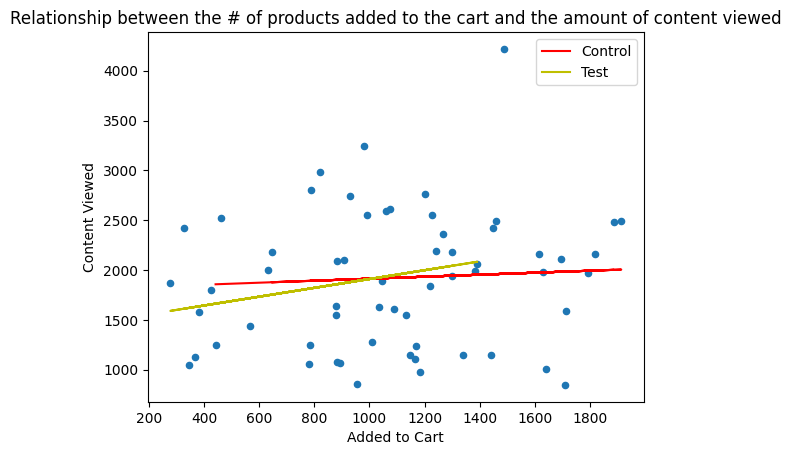

In [8]:
ab_data.plot(kind='scatter',x='Added to Cart',y='Content Viewed',)
slope,intercept,rvalue,pvalue,stderr=stats.linregress(control_data['Added to Cart'],control_data['Content Viewed'])
plt.plot(control_data['Added to Cart'],slope*control_data['Added to Cart']+intercept,color='r',label='Control')

slope,intercept,rvalue,pvalue,stderr=stats.linregress(test_data['Added to Cart'],test_data['Content Viewed'])
plt.plot(test_data['Added to Cart'],slope*test_data['Added to Cart']+intercept,color='y',label='Test')
plt.legend()
plt.title("Relationship between the # of products added to the cart and the amount of content viewed")
plt.show()

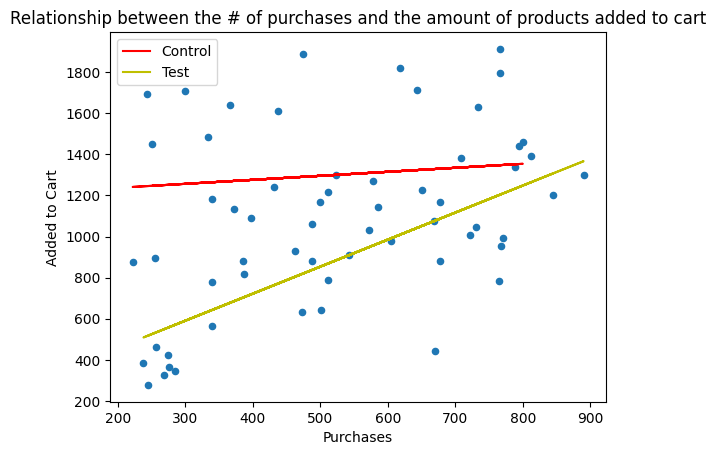

In [9]:
ab_data.plot(kind='scatter',x='Purchases',y='Added to Cart',)
slope,intercept,rvalue,pvalue,stderr=stats.linregress(control_data['Purchases'],control_data['Added to Cart'])
plt.plot(control_data['Purchases'],slope*control_data['Purchases']+intercept,color='r',label='Control')

slope,intercept,rvalue,pvalue,stderr=stats.linregress(test_data['Purchases'],test_data['Added to Cart'])
plt.plot(test_data['Purchases'],slope*test_data['Purchases']+intercept,color='y',label='Test')
plt.legend()
plt.title("Relationship between the # of purchases and the amount of products added to cart")
plt.show()

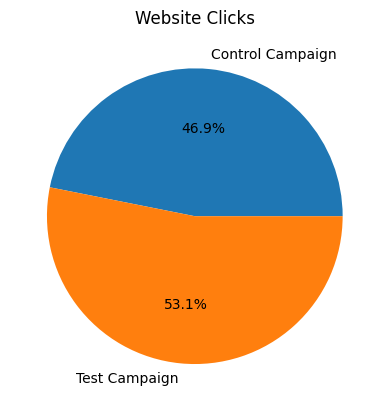

In [10]:
x = ab_data.loc[ab_data['Campaign Name'] == 'Control Campaign', 'Website Clicks'].sum()
y = ab_data.loc[ab_data['Campaign Name'] == 'Test Campaign', 'Website Clicks'].sum()
z = np.array([x,y])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Website Clicks")
plt.show()

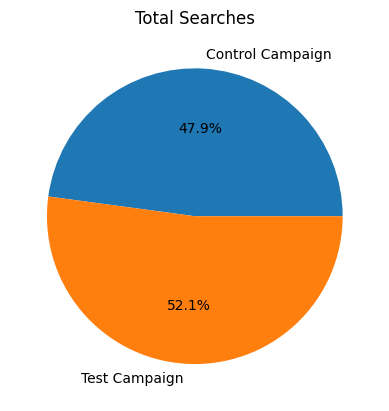

In [11]:
x = ab_data.loc[ab_data['Campaign Name'] == 'Control Campaign', 'Searches Received'].sum()
y = ab_data.loc[ab_data['Campaign Name'] == 'Test Campaign', 'Searches Received'].sum()
z = np.array([x,y])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Total Searches")
plt.show()

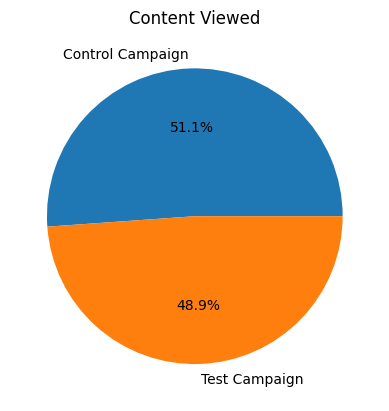

In [12]:
z = np.array([control_data['Content Viewed'].sum(),test_data['Content Viewed'].sum()])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Content Viewed")
plt.show()

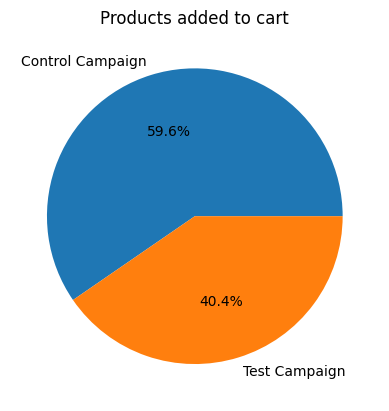

In [13]:
z = np.array([control_data['Added to Cart'].sum(),test_data['Added to Cart'].sum()])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Products added to cart")
plt.show()

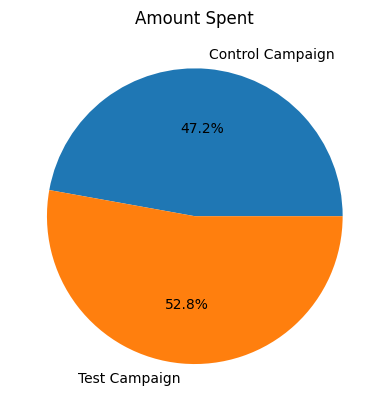

In [14]:
z = np.array([control_data['Amount Spent'].sum(),test_data['Amount Spent'].sum()])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Amount Spent")
plt.show()

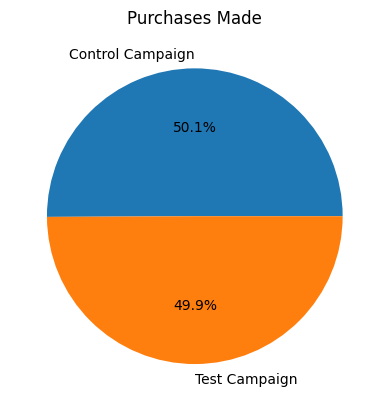

In [15]:
z = np.array([control_data['Purchases'].sum(),test_data['Purchases'].sum()])
labels=["Control Campaign", "Test Campaign"]
plt.pie(z,labels=labels,autopct='%1.1f%%')
plt.title("Purchases Made")
plt.show()
